In [17]:
import pandas as pd
from io import StringIO

data = """ID,Name,Duration,Rating,Genre
1,Inception,148,8.8,Sci-Fi

2,The Godfather,175,9.2,Crime
3,Interstellar,,8.6,Sci-Fi
,,,,
4,Parasite,132,,Thriller
5,The Dark Knight,152,9.0,
6,,120,7.5,Drama

7,Forrest Gump,142,8.8,Comedy
8,Avatar,,7.8,Sci-Fi
9,Gladiator,155,,Action
10,Titanic,195,7.9,
"""

df = pd.read_csv(StringIO(data))

# Treat empty strings as NaN
df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# Drop fully empty rows
df.dropna(how='all', inplace=True)

# Fill missing values with 100
df.fillna(100, inplace=True)

print(df)


      ID             Name  Duration  Rating     Genre
0    1.0        Inception     148.0     8.8    Sci-Fi
1    2.0    The Godfather     175.0     9.2     Crime
2    3.0     Interstellar     100.0     8.6    Sci-Fi
4    4.0         Parasite     132.0   100.0  Thriller
5    5.0  The Dark Knight     152.0     9.0       100
6    6.0              100     120.0     7.5     Drama
7    7.0     Forrest Gump     142.0     8.8    Comedy
8    8.0           Avatar     100.0     7.8    Sci-Fi
9    9.0        Gladiator     155.0   100.0    Action
10  10.0          Titanic     195.0     7.9       100


In [19]:
import pandas as pd
from io import StringIO

data = """ID,Name,Duration,Rating,Genre
1,Inception,148,8.8,Sci-Fi

2,The Godfather,175,9.2,Crime
3,Interstellar,,8.6,Sci-Fi
,,,,
4,Parasite,132,,Thriller
5,The Dark Knight,152,9.0,
6,,120,7.5,Drama

7,Forrest Gump,142,8.8,Comedy
8,Avatar,,7.8,Sci-Fi
9,Gladiator,155,,Action
10,Titanic,195,7.9,

# duplicates below
3,Interstellar,,8.6,Sci-Fi
6,,120,7.5,Drama
9,Gladiator,155,,Action


"""

# Load dataset
df = pd.read_csv(StringIO(data))

# Replace empty strings with NaN
df.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

# Drop completely empty rows
df.dropna(how='all', inplace=True)

# Fill missing values with 100
df.fillna(100, inplace=True)

# Drop rows where Duration > 120
df = df[df["Duration"].astype(float) <= 120]

# Check duplicates
duplicates = df.duplicated().any()
duplicate_count = df.duplicated().sum()

print("Cleaned dataset:\n", df, "\n")
print("Any duplicates?:", duplicates)
print("Number of duplicate rows:", duplicate_count)


Cleaned dataset:
                     ID          Name  Duration  Rating   Genre
2                    3  Interstellar     100.0     8.6  Sci-Fi
6                    6           100     120.0     7.5   Drama
8                    8        Avatar     100.0     7.8  Sci-Fi
11  # duplicates below           100     100.0   100.0     100
12                   3  Interstellar     100.0     8.6  Sci-Fi
13                   6           100     120.0     7.5   Drama 

Any duplicates?: True
Number of duplicate rows: 2


In [21]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Sample transactional data as list of lists
transactions = [
    ['Laptop', 'Mouse', 'Keyboard', 'USB Drive', 'Headphones'],
    ['Phone', 'Charger', 'Headphones', 'Power Bank', 'Cover'],
    ['Tablet', 'Stylus', 'Cover', 'Charger', 'Headphones'],
    ['Laptop', 'Headphones', 'USB Drive', 'Keyboard', 'Mouse'],
    ['Phone', 'Laptop', 'Charger', 'Headphones', 'USB Drive'],
    ['Camera', 'Tripod', 'SD Card', 'Laptop', 'Headphones'],
    ['Phone', 'Cover', 'Headphones', 'Power Bank', 'Charger', 'Laptop'],
    ['Tablet', 'Charger', 'Stylus', 'Cover', 'Laptop', 'Mouse'],
    ['Laptop', 'Mouse', 'Keyboard', 'USB Drive', 'Headphones', 'Charger'],
    ['Camera', 'Laptop', 'Headphones', 'Phone', 'Charger', 'USB Drive']
]

# Convert transactions to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm with minimum support = 0.5
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

print(frequent_itemsets)

   support                         itemsets
0      0.7                        (Charger)
1      0.9                     (Headphones)
2      0.8                         (Laptop)
3      0.5                      (USB Drive)
4      0.6            (Charger, Headphones)
5      0.5                (Charger, Laptop)
6      0.7             (Laptop, Headphones)
7      0.5          (Headphones, USB Drive)
8      0.5              (Laptop, USB Drive)
9      0.5  (Laptop, Headphones, USB Drive)


In [22]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

# Transform transactions into one-hot encoded DataFrame
transactions = [
    ['Laptop', 'Mouse', 'Keyboard', 'USB Drive', 'Headphones'],
    ['Phone', 'Charger', 'Headphones', 'Power Bank', 'Cover'],
    ['Tablet', 'Stylus', 'Cover', 'Charger', 'Headphones'],
    ['Laptop', 'Headphones', 'USB Drive', 'Keyboard', 'Mouse'],
    ['Phone', 'Laptop', 'Charger', 'Headphones', 'USB Drive'],
    ['Camera', 'Tripod', 'SD Card', 'Laptop', 'Headphones'],
    ['Phone', 'Cover', 'Headphones', 'Power Bank', 'Charger', 'Laptop'],
    ['Tablet', 'Charger', 'Stylus', 'Cover', 'Laptop', 'Mouse'],
    ['Laptop', 'Mouse', 'Keyboard', 'USB Drive', 'Headphones', 'Charger'],
    ['Camera', 'Laptop', 'Headphones', 'Phone', 'Charger', 'USB Drive']
]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm with minimum support 0.5
frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)

print(frequent_itemsets)

   support                         itemsets
0      0.9                     (Headphones)
1      0.8                         (Laptop)
2      0.5                      (USB Drive)
3      0.7                        (Charger)
4      0.7             (Laptop, Headphones)
5      0.5              (Laptop, USB Drive)
6      0.5          (Headphones, USB Drive)
7      0.5  (Headphones, Laptop, USB Drive)
8      0.6            (Charger, Headphones)
9      0.5                (Charger, Laptop)


In [76]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load and clean dataset
df = pd.read_csv('gender.csv')
df.columns = df.columns.str.strip()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna()

# Use all columns except 'Gender' as features, 'Gender' as target
X = df.drop('Gender', axis=1)
y = df['Gender']

# Encode categorical features and target
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.factorize(X[col])[0]
if y.dtype == 'object':
    y = pd.factorize(y)[0]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM (linear kernel)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.825

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       1.00      1.00      1.00         8
           2       0.63      1.00      0.77        12
           3       1.00      1.00      1.00        10

    accuracy                           0.82        40
   macro avg       0.91      0.82      0.81        40
weighted avg       0.89      0.82      0.80        40



In [66]:
# Lab 06: Predict the output using Bayesian Network (Naive Bayes Example)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Example synthetic dataset
data = {
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Encode categorical features
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.factorize(df[col])[0]

X = df.drop('Play', axis=1)
y = df['Play']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes classifier (Bayesian Network)
model = GaussianNB()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



Cluster labels for each point:
[0 0 0 1 1 1 2 0 0 1 1 1 2 2 0 0 0 1 1 1 2 2 2 0 0 0 1 1 1 2 2 2]


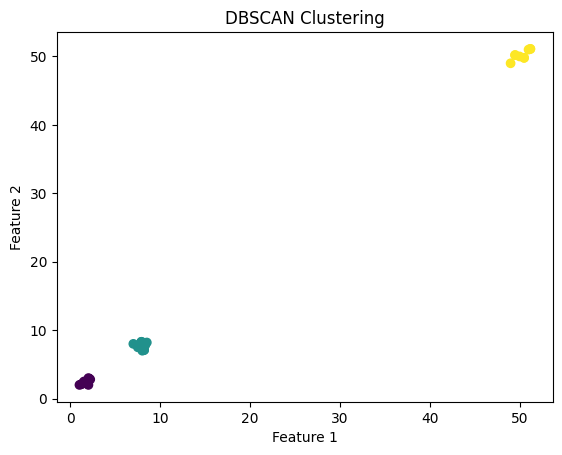

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Sample 2D data points
# Use the existing X variable, and add more points to make clusters denser
X_extra = np.array([
    [1.2, 2.1], [1.8, 2.2], [2.1, 2.9],
    [8.2, 7.1], [7.9, 8.3], [8.3, 7.8],
    [49.5, 50.2], [50.5, 49.8], [51.2, 51.1]
])
X = np.vstack([X, X_extra])

# DBSCAN with eps=2, minimum samples=2
dbscan = DBSCAN(eps=2, min_samples=2)
clusters = dbscan.fit_predict(X)

print("Cluster labels for each point:")
print(clusters)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

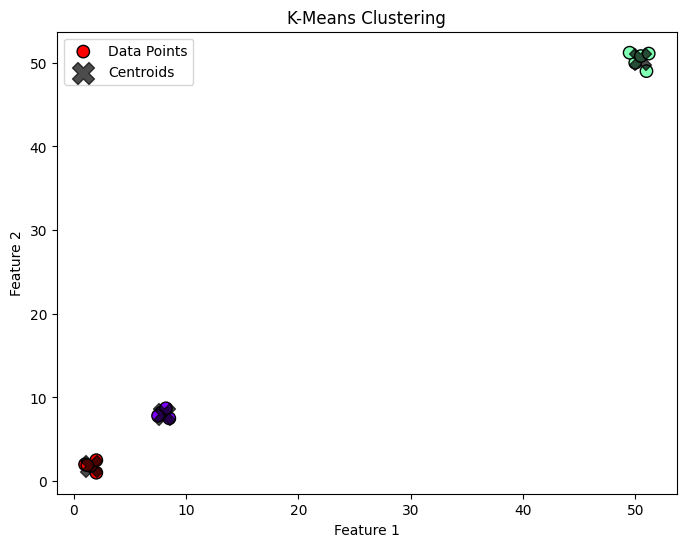

Cluster centers (centroids):
[[ 8.    8.04]
 [50.44 50.42]
 [ 1.54  1.84]]
Cluster labels for each point:
[2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]


In [10]:
# Lab 08: K-Means Clustering with Manually Defined Points
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Manually define a set of 2D points
X_manual = np.array([
    [1, 2], [2, 1], [1.5, 1.8], [2, 2.5], [1.2, 1.9],
    [8, 8], [8.5, 7.5], [7.8, 8.2], [8.2, 8.7], [7.5, 7.8],
    [50, 50], [51, 49], [49.5, 51.2], [50.5, 50.8], [51.2, 51.1]
])

# Apply K-means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_manual)
centers = kmeans.cluster_centers_

# Plotting the clusters and centroids
plt.figure(figsize=(8,6))
plt.scatter(X_manual[:, 0], X_manual[:, 1], c=labels, cmap='rainbow', s=80, edgecolor='k', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=250, alpha=0.7, marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Show cluster centers
print('Cluster centers (centroids):')
print(centers)
# Show cluster labels for each point
print('Cluster labels for each point:')
print(labels)